# Propagation code

In [25]:
# libraries
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import seaborn as sns

Definition of variables:

In [26]:
# Definition of variables

N       = 1024*4                            # Number of steps; Default 1025
lambda0 = 1550 * (10 ** -9)                 # Central spectrum wavelength; Default 1580 * (10 ** -9) m
Window  = 1000 * (10 ** -9)                 # Size of the wavelength window; Default 200 m
width   = 5.72 * (10 ** -9)                 # Size of the transmitted spectrum: 3.7e-9 to 7.3e-9 [m] 5.8e-9 3.5e-9
Nphi2   = 1001;                             # Number of phi2 points where the FWHM will be measured
c       = 3 * (10 ** 8)                     # Speed of light in vacuum

In [27]:
# derivate variables

lambdai   = lambda0 - (Window / 2)                                                                      # Initial wavelength [m]
lambdaf   = lambda0 + (Window / 2)                                                                      # Final wavelength [m]
lambdav   = np.linspace(lambdai,lambdaf,N)                                                              # Lambda vector

nu0       = c / lambda0                                                                                 # Central frequency
nuv       = np.flip( (1 / lambdav) * c )                                                                # Frequency vector; Inverse relation so flip the output
Trans_aux = np.float128(-( (lambdav - lambda0) / (width*2) ) ** 2)                                      # auxiliar value for Trans
Trans     = np.exp(Trans_aux)                                                                           # Supergaussian 32n order to simulate the spectrum
                       
dNu       = nuv[1] - nuv[0]                                                                             # Frequency differential [1/s]
Nu        = nuv[-1] - nuv[0] + dNu                                                                      # Inverted normalization parameter
t         = (1/Nu) *  np.arange(-(N-1)/2,((N-1)/2)+1,1)                                                 # Calculation of the Fourier transformed vector - time [s]
   
Deltanu   = (nuv - nu0) * np.ones(len(nuv))                                                             # Taylor expansion term [1/s]

phim      = 0 * (10 ** -24)                                                                             #  Value of beta2, dispersion term introduction
disp      = np.exp( (1j) * (-phim+(2*1j-1)*(phim/Nphi2)) * 2 * (np.pi ** 2) * Deltanu * Deltanu )       #  Dispersion term
Sin_aux   = (width * fft.fft(Trans*disp))
Sin       = fft.fftshift(Sin_aux)                                                                       # Fourier transform of the spectrum times the dispersion phase

aaa       = Trans
ap        = fft.fftshift(fft.fft(aaa*disp))

## Device

In [28]:
# Distance and Dispersion parameters
distance = .3 * (10 ** -3)           # 10e-3;%1e-3;%0.1e-3;  - 1e-2 Device length [m] IMPORTANTE PARA VERIFICIAR
alphaL    = 0*200                      # Linear losses [1/m]
tauFC    = 0.5 * (10 ** -9)           # FC relaxation time [s] 1e-9
n0s      = 3.47                       # Refractive index Silicon @signal wavelength
n0p      = 3.48                       # Refractive index Silicon @pump wavelength
n2       = 6e-18                      # Kerr coefficient [m^2/W]
betaTPA  = 0.8e-11;                   # TPA coefficient [m/W]

In [29]:
# Free Carrier parameters
sigma    = 1.45e-21                 # [m^2]
kc       = 1.35e-27

c        = 3 * (10 ** 8)            # speed of light in vaccuum [m/s]
epsilon  = 8.854 * (10 ** -12)      # Permittivity in vacuum
hbar     = 1.054 * (10 ** -34)      # Planck's constant over 2pi

In [30]:
# Dispersion terms
beta2p = -4 * (10 ** -24)               # [s^2/m] -1e-24
beta3p = -0.0915 * (10 ** -34)          # [s^3/m] 

In [31]:
#Raman parameters
gR     = 8.9 * (10 ** -11)                # Raman gain [m/W]
GammaR = np.pi * 105 * (10 ** 9)        # Spectral linewidth of Raman Gain
OmegaR = 2*np.pi * 15.6 * (10 ** 12)    # Central frequency of Raman spectrum
gammaR = (gR*GammaR)/OmegaR
tau1   = 1 / np.sqrt( (OmegaR ** 2) + (GammaR ** 2))
tau2   = 1/GammaR

## puslses

In [32]:
T0s = 5 * (10 ** -12)            # 5e-12 signal pulse HW@1/e;

In [33]:
# pump beam
lambda0p = 1550 * (10 ** -9)          # pump wavelength
omega0p  = (2*np.pi*c) / lambda0p     # central frequency for pump
k0p      = (2*np.pi) / lambda0p       # free space wave vector
T0p      = 1 * (10 ** -12)            # 5e-12; %pump pulse HW@1/e
ngp      = 5                          # Pump group index
rp       = betaTPA/ (2*k0p*n2)        # mu parameter for pump
mup      = 2*kc*k0p/sigma             # mu parameter for pump

## Simulation

In [34]:
# Variables
nt       = N
Tmax     = 20*T0s                                                                           # 20*max(T0p,T0s); %FFT points and window size
step_num = 1000                                                                             # Number of z steps, default value!!
deltaz   = distance / step_num                                                              # slice size for distance
dtau     = (2*Tmax) / nt                                                                    # slice size for time
tau      = t                        
omega    = (np.pi/Tmax) * np.concatenate((np.arange(-(nt/2)+1,1,1), np.arange(0,(nt/2),1)))
numb     = 1                                                                                # numb=10
p        = step_num/numb                                                                    # p is the amount of pulses to be stored

ap       = ap * (1/np.max(ap))
ap0      = ap
omega

array([-6.43084016e+13, -6.42769857e+13, -6.42455698e+13, ...,
        6.42455698e+13,  6.42769857e+13,  6.43084016e+13])

## Simulation Specs

In [35]:
# Calculation for BPM using the split step method
R = 0     # if there is Raman, R=1, otherwise R = (any other value)
m = 1     # if there are FC and Kerr, m=1, otherwise m=0

In [36]:
# For the Following nonlinear parameters, put to 1 if they should be simulated and to 0 if not. s: signal and p: pump 

In [37]:
#Linear Absorption
ABSs = 0
ABSp = 1

In [38]:
#Kerr effect
KERRs = 0
KERRp = 1

In [39]:
#Free Carrier Absorption
FCAs = 0
FCAp = 1

In [40]:
#Free Carrier Refraction
FCRs = 0
FCRp = 1

In [41]:
#Two-Photon Absorption
TPAs = 0
TPAp = 1

In [42]:
# Second Order Dispersion
disps2 = 0
dispp2 = 1

In [43]:
# Third Order Dispersion
disps3 = 0
dispp3 = 1

In [44]:
# Waveguide parameters
h1         = 1000                                                   # lower cladding (nm)
h2         = 220                                                    # silicon core (nm)
h3         = 2000-h1-h2                                             # upper cladding (nm)

w1         = 220                                                    #170;                   % waveguide full-width (nm) one of the rails
w2         = 200                                                    # slot full-width (nm)
w1         = 2*w1                                                   # waveguide full-width (nm) two of the rails
side       = (3000-w1-w2)/2                                         # space on side of waveguide (nm)

vg         = c / ngp                                                # group velocity

A0         = h2*(w1)* (10 ** -18)                                   # h2*(w1+w2)*1e-18;

kappa      = 0.431

gamma1     = (8.2558 * (10**-21) + 1j * 1.3139 * (10 ** -22))       # slot nonlinear w=216nm W_slot=157nm
gamma2     = (1.1828 * (10**-21) + 1j*3.3796 * (10 ** -22))         # Si nonlinearity
gamma      = (9.3254 * (10**-8)  + 1j*2.28285 * (10**-9))*A0        # (4.11672e-8+1i*8.98553e-10)*A0;

gamma_real = gamma.real
gamma_imag = gamma.imag

neff       = 3.48
A_L        = c/(neff*vg)
A_FC       = c*kappa/(neff*vg)

n_FCp      = omega0p*kappa/(neff*vg)

alphaL     = A_L*alphaL
sigma      = sigma*A_FC
mup        = n_FCp*mup/k0p
I0p        = 20

ggama_r    = 3*omega0p*(gamma_real*KERRp)/(4*epsilon*A0*(vg ** 2));     #446.5*KERRp;
ggama_i    = 3*omega0p*(gamma_imag*TPAp)/(4*epsilon*A0*(vg ** 2));

Slength    = ((T0p ** 2)/beta2p)
Tlength    = ((T0p ** 3)/beta3p)
Nlength    = 1/(I0p*(ggama_r))

In [45]:
# Disperion term
pump_fourier_factor = np.exp(1j*(0.5*beta2p*dispp2*(omega**2)-omega)*deltaz)*np.exp(1j*(1/6)*beta3p*dispp3*(omega**3)*deltaz)*np.exp(-ABSp*alphaL/2*deltaz) # phase factor of the pump wave
alphaL

0.0

In [46]:
# Keer term
pump_Kerr_hz = 1j*I0p*(ggama_r+ggama_i*1j)*deltaz    # nonlinear factor for Kerr effect of the pump wave

In [47]:
# Free carrier term
pump_FC_hz = sigma/2*(FCAp*1+FCRp*1j*mup)*deltaz

## Main loop

In [48]:
# scheme: 1/2N -> D -> 1/2N; first half step nonlinear

Nc    = np.zeros([np.array([tau]).shape[0],np.array([tau]).shape[1]])

tempp = ap
ass = 0

if m == 1:
    tempp = ap*np.exp((abs(ap)**2)*pump_Kerr_hz/2)*np.exp(-pump_FC_hz*Nc/2)
    
if R==1:
    temps           = temps + 1j*gammaR*ap*fft.fft(HR1*fft.ifft(np.conj(ap)*ass))*deltaz/2
    tempp           = tempp + 1j*gammaR*ass*fft.fft(HR2*fft.ifft(np.conj(ass)*ap))*deltaz/2
    Ramanterms[:,1] = gammaR*ap*fft.fft(HR1*fft.ifft(np.conj(ap)*ass))*deltaz/2
    

In [49]:
# Main loop
for i in range(1,step_num+1):
    f_tempp = fft.ifft(tempp)*pump_fourier_factor
    ap = fft.fft(f_tempp)
    
    if m == 1:
        tempp = ap*np.exp((abs(ap)**2)*pump_Kerr_hz)*np.exp(-pump_FC_hz*Nc)
        
    if R == 1:
        tempp = tempp + 1j*gammaR*ass*fft.fft(HR2*fft.ifft(np.conj(ass)*ap))*deltaz
        
if m==1:
    ap = tempp*np.exp((abs(ap)**2)*pump_Kerr_hz/2)*np.exp(-pump_FC_hz*Nc/2) #Final field
else:
    ap = tempp
    
if R == 1:
    ap = tempp + 1j*gammaR*ass*fft.fft(HR2*fft.ifft(np.conj(ass)*ap))*deltaz
else:
    ap = tempp

In [50]:
f_tempp  = fft.fftshift(fft.ifft(ap))*(nt*dtau)        #/sqrt(2*pi); %Final spectrum
f_tempp0 = fft.fftshift(fft.ifft(ap0))*(nt*dtau)       # Initial spectrum

## Plot

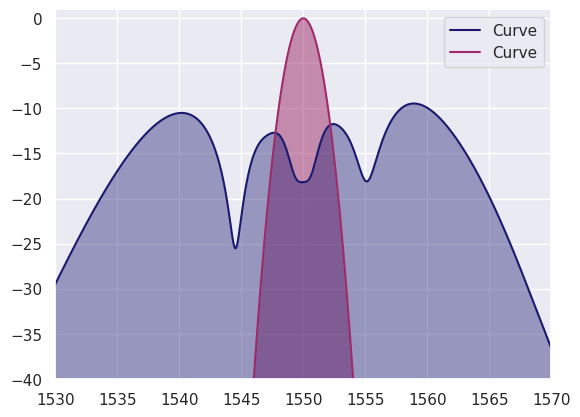

In [51]:
lambdap  = 2*np.pi*c/(fft.fftshift(omega)+2*np.pi*c/lambda0)
loss1    = 10*np.log10((np.sum(abs(ap))**2)/(np.sum(ap0)**2))/distance/100

f_tempp2 = 10*np.log10(f_tempp*np.conj(f_tempp)/np.max(f_tempp0*np.conj(f_tempp0)))
x = lambdap * (10 ** 9)
y = f_tempp2[0].real
xx = fft.fftshift(lambdap) * (10 ** 9)
yy = 10 * np.log10(Trans*np.conj(Trans))
sns.set(style="darkgrid")

fig, ax = plt.subplots()
ax.plot(x, y, label="Curve", color="#191970")
ax.plot(xx, yy, label="Curve", color="#9F2B68")
ax.fill(xx,yy, facecolor='#9F2B68', linewidth=1, alpha=0.5)
ax.fill(x,y, facecolor='#191970', linewidth=1, alpha=0.4)
ax.legend()
plt.xlim([1530,1570])
plt.ylim([-40,1])
plt.show()

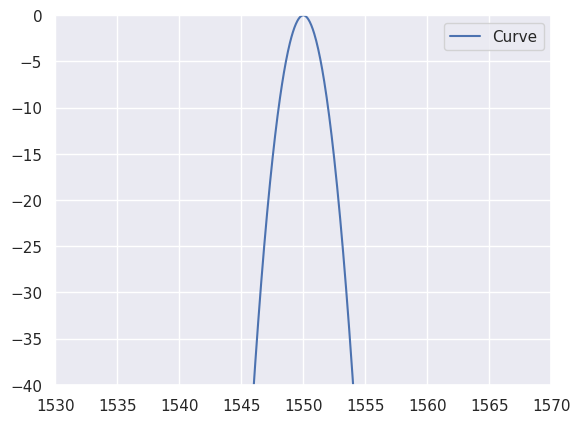

In [52]:
x = fft.fftshift(lambdap) * (10 ** 9)
y = 10*np.log10(aaa*np.conj(aaa))

fig, ax = plt.subplots()
ax.plot(x, y, label="Curve")
#ax.plot(xx, yy, label="Curve")

ax.legend()
plt.xlim([1530,1570])
plt.ylim([-40,0])
plt.show()

In [53]:
betaTPA*I0p

1.6e-10

In [54]:
class GeSbS:
    import numpy as np
    def __init__(self, N,T_window,lambda_0):
        self.N = N
        self.T_window   = T_window
        self.lambda_0   = lambda_0
        
        # Ventana temporal
        self.t_step     = T_window / N
        self.t_vector   = np.arange(-N/2,N/2,1) * t_step 
        
        
        self.w_window   = 2*np.pi / T_window
        self.w_step     = w_window / N
        self.w_vector   = np.arange(-N/2,N/2,1) * w_step
        string = 'Prueba'
        self.string = string
    
    def first(self):
        return self.w_vector

In [55]:
GeSbS().first((2 ** 13))

TypeError: GeSbS.__init__() missing 3 required positional arguments: 'N', 'T_window', and 'lambda_0'

In [1]:
import numpy as np
import numpy.fft as fft

In [28]:
# ventanas
N = 4096                                                # Muestreo temporal
T_window   = 100 * (10 ** -12)                                         # Ventana temporal
t_step     = T_window / N                                    # Paso temporal
t_vector   = np.arange(-N/2,N/2,1) * t_step         # vector de tiempo
w_window   = 2*np.pi / T_window                                       # ventana frecuencial
w_step     = w_window / N                                    # paso frecuencial
#w_vector   = np.arange(-N/2,N/2,1) * w_step         # vector de frecuencias
w_vector   = (np.pi/T_window) * np.concatenate((np.arange(-(N/2)+1,1,1), np.arange(0,(N/2),1)))

In [29]:
# pulso
P             = 20                                  # potencia de entrada en W
c             = 3 * (10 **8)
lambda_0      = 1550 * (10 ** -9)                  # longitud de onda central
FWHM          = 1000 * (10 ** -9)                  # Full Width Half Maximum
width         = 5.72 * (10 ** -9)                  # Tamaño del espectro transmitido
lambda_i      = lambda_0 - (FWHM/2)                # W inicial
lambda_f      = lambda_0 + (FWHM/2)                # W final
lambda_vector = np.linspace(lambda_i,lambda_f,N)   # vector de lambda
pulse_aux     = np.float128(-( (lambda_vector - lambda_0) / (width*2) ) ** 2)    # Gaussiana
pulse         = np.exp(pulse_aux)                                                # Gaussiana
fourier_pulse = fft.fft(pulse)                                                   # Transformada de Fourier pulso
input_field   = fourier_pulse / np.max(fourier_pulse)                            # pulso de entrada

In [30]:
# Parametros del dispositivo

#parametros lineales
device_length = 13 * (10 ** -3)                                           # largo del dispositivo
betas         = np.array([-6.99 * (10 ** -25), -7.27929 * (10 ** -39)])   # parametros de dispersión - beta[0]=s^2/m, beta[1]=s^3/m
A_eff         = .42 * (10 ** -12)                                         # Area efectiva (m^2)
Losses        = 0                                                         # Perdidas lineales dB/cm
alpha         = 0                                                         # Perdidas lineales en cm^-1

#parametros no lineales
n2            = 10 * (10 ** -18)                                          # Indice de refracción no lineal (m^2)/W
#gamma         = (2 * np.pi * n2) / (lambda_0 * A_eff)                     # Parametro no lineal
gamma         = 100

In [31]:
# Especificaciones de la simulación
step_number = 1000                                 # pasos de la simulación
dz          = device_length / step_number          # tamaño de paso

In [32]:
# Operadores
dispersion_operator = np.exp(1j*(0.5*betas[0]*(w_vector**2)-w_vector)*dz)*np.exp(1j*(1/6)*betas[1]*(w_vector**3)*dz)*np.exp(-alpha/2*dz) # phase factor of the pump wave
nonlineal_operator  = 1j*P*gamma*dz               # Operador no lineal
w_vector

array([-6.43084016e+13, -6.42769857e+13, -6.42455698e+13, ...,
        6.42455698e+13,  6.42769857e+13,  6.43084016e+13])

In [33]:
# Main Loop 
# Esquema 1/2 nonlinear, dispersion, 1/2 nonlinear
Initial_HalfStep = input_field*np.exp((abs(input_field)**2)*nonlineal_operator/2) # 1/2 nonlinear

for i in range(1,step_number+1):
    
    dispersion_HalfStep = fft.ifft(Initial_HalfStep) * dispersion_operator  # dispersion
    field               = fft.fft(dispersion_HalfStep)
    
    Initial_HalfStep        = field * np.exp((abs(field)**2)*nonlineal_operator/2)

    
field_ssfm  = Initial_HalfStep * np.exp((abs(Initial_HalfStep)**2)*nonlineal_operator/2)   # 
final_Field = fft.ifft(field_ssfm)

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
ifft_input_pulse    = fft.ifft(input_field) * np.conj(fft.ifft(input_field))
final_field_dBs     = 10*np.log10( (final_Field*np.conj(final_Field)) / np.max(ifft_input_pulse))
lambdap             = 2*np.pi*c/(w_vector+2*np.pi*c/lambda_0)
imput_field_dBs     = 10*np.log10( ifft_input_pulse/ np.max(ifft_input_pulse) )

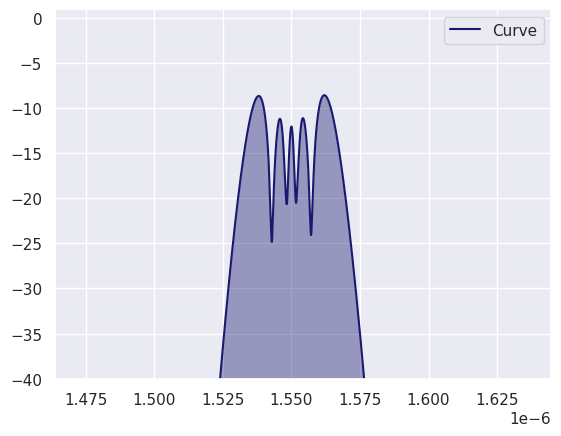

In [36]:
x, y = lambdap, final_field_dBs
sns.set(style="darkgrid")

fig, ax = plt.subplots(dpi=100)
ax.plot(x, y, label="Curve", color="#191970")
#ax.plot(x,imput_field_dBs, color='red')
ax.fill(x,y, facecolor='#191970', linewidth=1, alpha=0.4)
plt.ylim([-40,1])
#plt.xlim([-40,1])
ax.legend()
plt.show()